#Questao 1

Resolva o seguinte problema difusivo

\begin{equation*}
    \begin{cases}
        \frac{\partial u}{\partial t} = 0.1 \frac{\partial^2 u}{\partial x^2} + 0.001(50-u)\text{ para }  x \in (0,1)\\
        \frac{\partial u}{\partial x} = 0 \text{ para }  x=0\\
        u = 75 \text{ para } x=1\\
        u(x,0) = 0
    \end{cases}
\end{equation*}

considerando $t\in(0,1]$, $h_x=0.05$ e $h_t=0.001$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams['figure.figsize'] = [8, 6]

kappa=0.1

h_x=0.05
h_t=0.001

x = np.arange(0, 1+h_x/2, h_x)
t = np.arange(0, 1+h_t/2, h_t)


#Condicoes de Contorno
u_a = 0 #neumann esquerdo
u_b = 75 #dirichlet direito
u_0 = 0 #condicao inicial em 0.4 ... 0.6

tam = len(x) #dimensão do sistema
steps = len(t) #numero de passos de tempo


r = (kappa*h_t)/(h_x**2)

u=np.zeros(tam)

for i in range(tam):
  if i*h_x >=0.4 and i*h_x <=0.6+h_x/2:
    u[i]=u_0

u_new=np.zeros(tam)
sol_tempo = []
sol_tempo.append(u)

for k in range(steps):
  for i in range(tam):
    #Condição de contorno de Neumann
    if(i==tam-1):
      u_new[i] = u_b
    else:
      uip = 2*h_x*u_b+u[tam-2] if i==tam-1 else u[i+1]
      uim = 2*h_x*u_a+u[1] if i==0 else u[i-1] 
      u_new[i] = r*(uim - 2*u[i]+ uip) + h_t*0.001*(50-u[i]) + u[i]

  u = np.copy(u_new)
  sol_tempo.append(u)


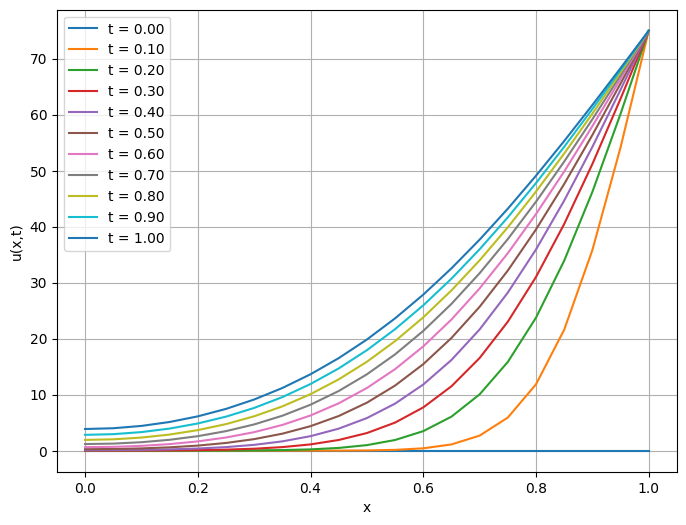

In [ ]:
#Plotando a solução a cada p passos

p=100

for k in range(0,steps, p):
  plt.plot(x,sol_tempo[k], label='t = '+"{:.2f}".format(k*h_t))
plt.legend()
plt.grid()
plt.ylabel('u(x,t)')
plt.xlabel('x')
plt.show()

#Questão 2

Resolva o seguinte problema difusivo utilizando a estratégia de Crank–Nicolson

\begin{equation*}
    \begin{cases}
        \displaystyle \frac{\partial u}{\partial t} = 0.1 \frac{\partial^2 u}{\partial x^2} \text{ para }  x \in (0,1)\\
        \displaystyle \frac{\partial u}{\partial x} = 0 \text{ para }  x=0 \text{ ou } x=1\\
        \displaystyle u(x,0) = \begin{cases}
            50 \text{ para }x\in[0.4, 0.6]\\
            0 \text{ c.c.}
        \end{cases}\\
    \end{cases}
\end{equation*}
considerando $t\in(0,1]$

In [ ]:
plt.rcParams['figure.figsize'] = [8, 6]

kappa=0.1

h_x=0.01
h_t=0.001

x = np.arange(0, 1+h_x/2, h_x)
t = np.arange(0, 1+h_t/2, h_t)


#Condicoes de Contorno
u_a = 0 #neumann esquerdo
u_b = 0 #neumann direito
u_0 = 50 #condicao inicial 

tam = len(x) #dimensão do sistema
steps = len(t) #numero de passos de tempo

r = (kappa*h_t)/(h_x**2)
u=np.zeros(tam)

#Condição Inicial
for i in range(tam):
  if i*h_x >=0.4 and i*h_x <=0.6+h_x/2:
    u[i]=u_0

sol_tempo = []
sol_tempo.append(np.copy(u))


k_max = 100000 #numero maximo de iteraçoes do metodo
error_max = 1e-8 #erro para convergencia

for n in range(steps): #loop do tempo
  u_n = np.copy(u)
  k=0
  error=1
  while (k<k_max and error > error_max): #loop da iteraçao de Gauss-Seidel
    u_old = np.copy(u)
    for i in range(tam): #loop sobre os pontos do espaço
      uip_n = 2*h_x*u_b+u_n[tam-2] if i==tam-1 else u_n[i+1]
      uim_n = 2*h_x*u_a+u_n[1] if i==0 else u_n[i-1] 
      uip = 2*h_x*u_b+u[tam-2] if i==tam-1 else u[i+1]
      uim = 2*h_x*u_a+u[1] if i==0 else u[i-1] 
      u[i] = (r*uim_n + (1-2*r)*u_n[i]+ r*uip_n+r*uim + r*uip)/(1+2*r)
    error = np.linalg.norm(u-u_old, np.inf)/np.linalg.norm(u, np.inf)
    k=k+1
  sol_tempo.append(np.copy(u))



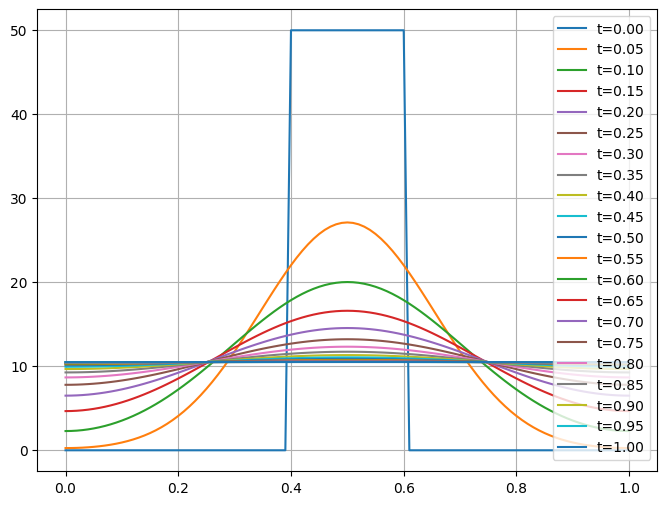

In [ ]:

#Plotando a solução a cada p passos

p=50

for k in range(0,steps, p):
  plt.plot(x,sol_tempo[k], label='t='+"{:.2f}".format(k*h_t))
plt.legend()
plt.grid()
plt.show()